# Veri Bilimine Giriş Dersi Proje Ödevi
# Part-1: Keşifçi Veri Analizi ve Veri Görselleştirme:

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [205]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



### Veri Seti Hikayesi:
Titanik kazası, 15 Nisan 1912'de gerçekleşen ve tarihin en büyük deniz felaketi olarak bilinen olaydır. RMS Titanic adlı yolcu gemisi, bir buz dağına çarparak batmış ve binlerce insan hayatını kaybetmiştir. Bu trajik olay, deniz güvenliği standartları üzerinde önemli değişikliklere yol açmıştır. Titanik kazası, birçok veri bilimi projesinde kullanılan geniş bir veri seti sunmaktadır. Bu veri seti, yolcuların demografik bilgilerini içerir ve çeşitli analizler için kullanılabilir, örneğin hayatta kalma olasılıklarını tahmin etme veya kurtulma faktörlerini belirleme gibi.

#### PassengerId: 
Yolcu kimlik numarasıdır. Her bir yolcunun benzersiz bir kimlik numarası vardır.

#### Pclass (Passenger Class):
Yolcunun seyahat ettiği sınıfı ifade eder.
1: 1. Sınıf
2: 2. Sınıf
3: 3. Sınıf

#### Name:
Yolcunun ismidir.

#### Survived:
Yolcunun hayatta kalıp kalmadığını gösteren değişkendir.
0: Hayatta kalmadı
1: Hayatta kaldı

#### Sex:
Yolcunun cinsiyetini belirtir.
Male: Erkek
Female: Kadın

#### Age: 
Yolcunun yaşıdır.

#### SibSp (Siblings/Spouses Aboard):
Yolcunun gemideki kardeş veya eş sayısını belirtir.

#### Parch (Parents/Children Aboard):
Yolcunun gemideki ebeveyn veya çocuk sayısını belirtir.

#### Ticket: 
Yolcunun bilet numarasıdır.

#### Fare:
Yolcunun ödediği bilet ücretidir.

#### Cabin:
Yolcunun kabin numarasını belirtir. Eksik veriler içerebilir.

#### Embarked:
Yolcunun gemiye bindiği limanı belirtir.
C: Cherbourg
Q: Queenstown
S: Southamptone

---------------------------------------------------------------------------------------------------------------------------------------------------------

In [206]:
data.shape

(891, 12)

##### Veri Seti 891 satır ve 12 sütundan oluşmaktadır.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Bu veri seti;
##### Pandas dataframe şeklinde,
##### 891 adet gözlem değeri,
##### 12 değişkeni var,
##### Ramda 83.7KB alan tutuyor.
---------------------------------------------------------------------------------------------------------------------------------------------------------


In [208]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Age,714.0,29.679272,14.536483,0.0,20.0000,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


##### (Sayısal) değişkenlerin betimsel özellikleri
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [209]:
data.isnull().values.any() 

True

##### Veri setinde eksik değer vardır.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [210]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

##### Age ve Cabin sütunlarında eksik değerler vardır.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [211]:
data["Pclass"].value_counts()                        

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

##### Pclass (Passenger Class) için 3 farklı sınıf vardır.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [212]:
data["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

##### Parch (Parents/Children Aboard) değerlerine bakıldığında gemideki yolcunun, ebeveyn veya çocuk sayısının en fazla 6 bireye kadar çıktığı görülüyor.
---------------------------------------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Yolcu Sınıf Dağılım Grafiği')

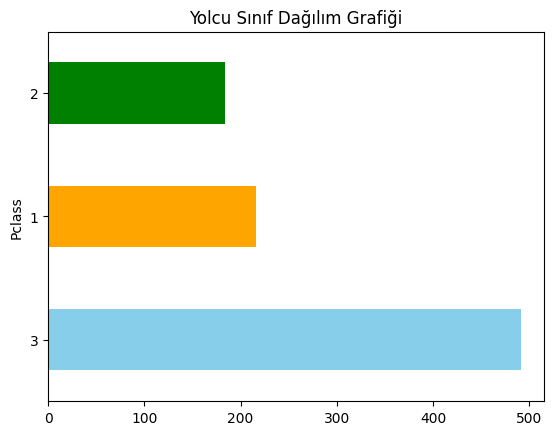

In [213]:
data["Pclass"].value_counts().plot(kind="barh", color=['skyblue', 'orange', 'green']).set_title("Yolcu Sınıf Dağılım Grafiği")

##### Gemideki yolcuların çoğunluğu 3. sınıf birey/bireylerden oluştuğu görülüyor.
---------------------------------------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Yaş Dağılım Grafiği')

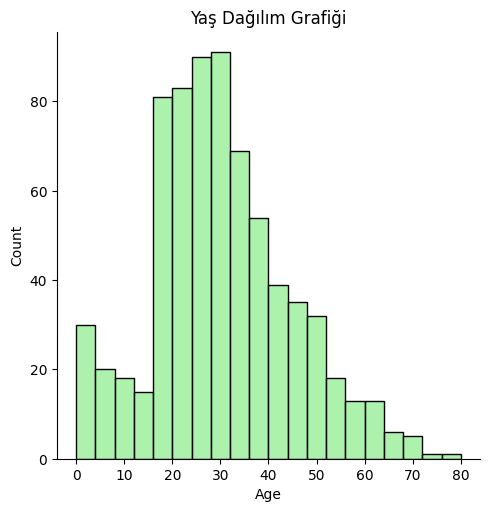

In [214]:
sns.displot(data["Age"], kde=False, bins=20, color='lightgreen')
plt.title("Yaş Dağılım Grafiği")

##### Gemideki yolcuların yoğunlukla 20-40 arası yaşında olduğu görülmekte. Bu grafikten yola çıkarsak yolculuğa çıkanların genellikle yetişkin bireyler olduğu ortadadır. (Eksik veriler sayılmamıştır.)
---------------------------------------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Yolcunun Sahip Olunan Ebeveyn/Çocuk Grafiği')

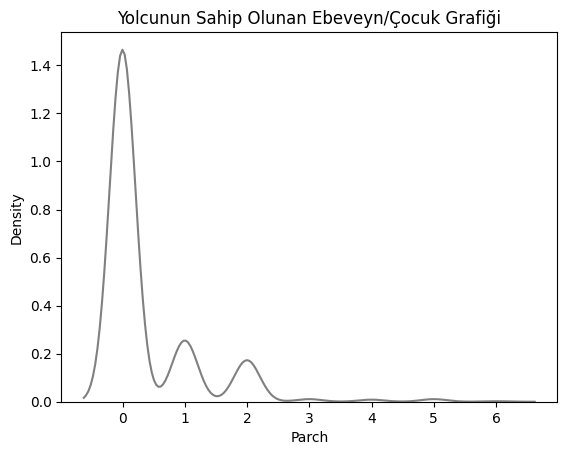

In [215]:
sns.kdeplot(data["Parch"], color='grey');
plt.title("Yolcunun Sahip Olunan Ebeveyn/Çocuk Grafiği")

##### Gemiye binen yolcuların çoğunun ebeveyn veya çocuğu olmadığı görülüyor. Buda gemiye binenlerin büyük çoğunluğunun tek başına bindiğinin göstergesidir.
---------------------------------------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.02, 'Cinsiyet/Yaş Dağılım Grafiği')

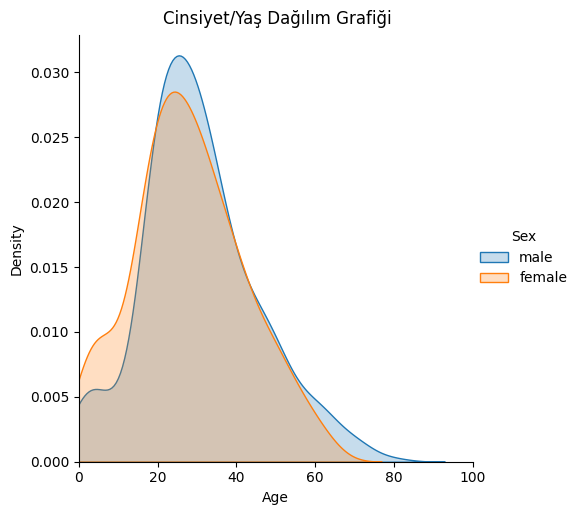

In [216]:
g = (sns
 .FacetGrid(data,
              hue = "Sex",
              height = 5,
              xlim = (0, 100)) 
 .map(sns.kdeplot, "Age", fill= True) 
 .add_legend()
); 

g.fig.suptitle("Cinsiyet/Yaş Dağılım Grafiği", y=1.02)

##### Bu grafikte ise gemideki yolcuların cinsiyetine göre hangi yaş aralığında daha yoğunluk belirttiği gözükmektedir. Kadın ve erkek yolcular için çoğunun yetişkin bireyler olduğu gözükmekte ayrıca kadın çocukların erkek çocuklardan fazla olduğu da görülmekte. (Eksik veriler sayılmamıştır.)
---------------------------------------------------------------------------------------------------------------------------------------------------------

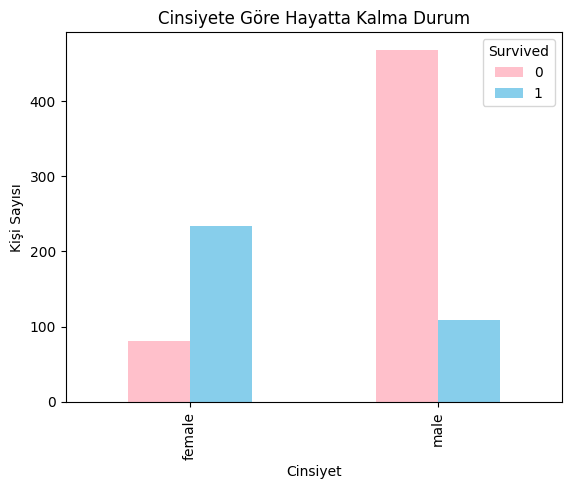

In [299]:
survival_counts = data.groupby(['Sex', 'Survived']).size().unstack()

ax = survival_counts.plot(kind='bar', stacked=False, color=['pink', 'skyblue'], alpha=1)

plt.title("Cinsiyete Göre Hayatta Kalma Durum")
plt.ylabel("Kişi Sayısı")
plt.xlabel("Cinsiyet")
plt.show()

##### Bu grafikte ise gemi kazasında hayatını kaybedenlerin hangi cinsiyette ne kadar kişi olduğunu gösteriyor. Grafiğe bakılarak gemi kazasında kadınların yarısından fazlasının kurtulduğu diğer yanda ise erkeklerin çoğunun hayatının kaybettiği söylenebilir.
---------------------------------------------------------------------------------------------------------------------------------------------------------

# Part-2: Veri Ön İşleme:
## Aykırı Değer Problemi Ve Çözümleme:

In [301]:
datatest = pd.read_csv('titanictest.csv')
datatest = datatest.select_dtypes(include = ['float64', 'int64'])
datatest.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


##### Test csv dosyası oluşturduk.
---------------------------------------------------------------------------------------------------------------------------------------------------------

## Boxplot (Interquartile Range (IQR)) Yöntemi:

In [302]:
#Fare

In [303]:
datatest_fare = datatest["Fare"]

##### Yolcuların ödediği ücret üzerinden aykırı değer hesaplaması yapıyoruz.
---------------------------------------------------------------------------------------------------------------------------------------------------------

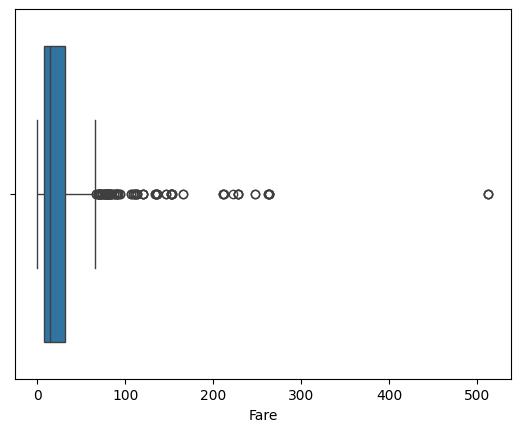

In [304]:
sns.boxplot(x = datatest_fare);

##### Bu grafiktede görüyoruz ki alt sınıra ait aykırı değer yok fakat üst sınıra ait çok fazla aykırı değer var. 
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [305]:
Q1 = datatest_fare.quantile(0.25) #Veri setinin %25'lik indeksine karşılık gelen değer
Q3 = datatest_fare.quantile(0.75) #Veri setinin %75'lik indeksine karşılık gelen değer
IQR = Q3-Q1 #Çeyrekler açıklığı

In [306]:
Q1

7.9104

In [307]:
Q3

31.0

In [308]:
IQR

23.0896

In [309]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [310]:
alt_sinir

-26.724

##### Alt sınır değeri.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [311]:
ust_sinir

65.6344

##### Üst sınır değeri.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [312]:
(datatest_fare < alt_sinir) | (datatest_fare > ust_sinir)

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

##### Aykırı değerleri görüntüleme.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [313]:
aykiri_dataset = (datatest_fare < alt_sinir) | (datatest_fare > ust_sinir)
aykiri_dataset.head()

0    False
1     True
2    False
3    False
4    False
Name: Fare, dtype: bool

##### Aykırı değerleri bir listeye atma işlemi.
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [314]:
datatest_fare[aykiri_dataset]

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

##### Aykırı değerleri ana listeden çekme işlemi.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [315]:
datatest_fare[aykiri_dataset].index

Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
       ...
       792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
      dtype='int64', length=116)

##### Aykırı değerlerin ana listede denk geldikleri indeks listesi.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [316]:
alt_aykiri=(datatest_fare < alt_sinir)
alt_aykiri

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

##### Alt aykırı değerleri bulma işlemi.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [317]:
ust_aykiri=(datatest_fare > ust_sinir)
ust_aykiri

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

##### Üst aykırı değerleri bulma işlemi.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [318]:
data_fare = datatest["Fare"]

In [319]:
data_fare[alt_aykiri]

Series([], Name: Fare, dtype: float64)

##### Alt aykırı değerleri yazdırma işlemi.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [320]:
data_fare[ust_aykiri]

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

##### Üst aykırı değerleri yazdırma işlemi.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [321]:
ust_sinir

65.6344

##### Üst sınır değeri.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [322]:
data_fare[ust_aykiri] = ust_sinir
data_fare[ust_aykiri]

C:\Users\Muzolas\AppData\Local\Temp\ipykernel_19996\3515918898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fare[ust_aykiri] = ust_sinir


1      65.6344
27     65.6344
31     65.6344
34     65.6344
52     65.6344
        ...   
846    65.6344
849    65.6344
856    65.6344
863    65.6344
879    65.6344
Name: Fare, Length: 116, dtype: float64

##### Üst aykırı değerleri üst sınıra göre baskılama işlemi.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [323]:
datas = pd.read_csv('titanictest.csv')
datas["Fare"] = data_fare
datas.head()
datas.to_csv('titanictest.csv', index=False)

##### Veri setimizde alt ve üst aykırı değer kalmadı hepsi baskılandı.
---------------------------------------------------------------------------------------------------------------------------------------------------------

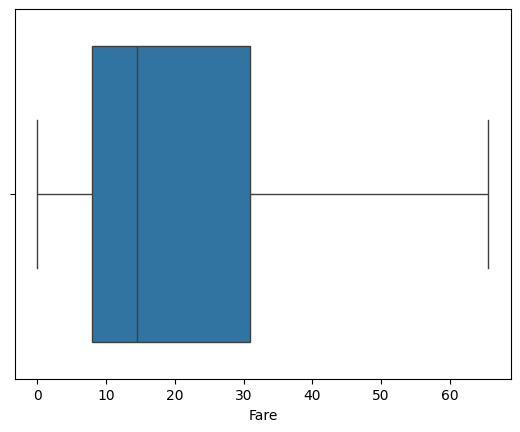

In [324]:
sns.boxplot(x = datatest_fare);

In [325]:
#Age

In [326]:
datatest_age = datatest["Age"]

##### Yolcuların yaş değerleri için aykırı değer hesaplaması yapıyoruz.
---------------------------------------------------------------------------------------------------------------------------------------------------------

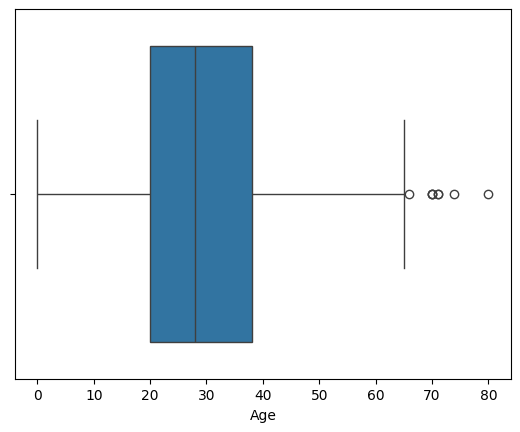

In [327]:
sns.boxplot(x = datatest_age);

---------------------------------------------------------------------------------------------------------------------------------------------------------

In [328]:
Q1 = datatest_age.quantile(0.25) #Veri setinin %25'lik indeksine karşılık gelen değer
Q3 = datatest_age.quantile(0.75) #Veri setinin %75'lik indeksine karşılık gelen değer
IQR = Q3-Q1 #Çeyrekler açıklığı

In [329]:
Q1

20.0

In [330]:
Q3

38.0

In [331]:
IQR

18.0

In [332]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [333]:
alt_sinir

-7.0

##### Alt sınır değeri.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [334]:
ust_sinir

65.0

##### Üst sınır değeri.
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [335]:
(datatest_age < alt_sinir) | (datatest_age > ust_sinir)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

##### Aykırı değerleri görüntüleme.
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [336]:
datatest_age[aykiri_dataset]

1      38.0
27     19.0
31      NaN
34     28.0
52     49.0
       ... 
846     NaN
849     NaN
856    45.0
863     NaN
879    56.0
Name: Age, Length: 116, dtype: float64

##### Aykırı değerleri bir listeye atma işlemi.
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [337]:
datatest_age[aykiri_dataset].index

Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
       ...
       792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
      dtype='int64', length=116)

##### Aykırı değerlerin ana listede denk geldikleri indeks listesi.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [338]:
alt_aykiri=(datatest_age < alt_sinir)
alt_aykiri

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

##### Alt aykırı değerleri bulma işlemi.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [339]:
ust_aykiri=(datatest_age > ust_sinir)
ust_aykiri

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

##### Üst aykırı değerleri bulma işlemi.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [340]:
data_age = datatest["Age"]

In [341]:
data_age[alt_aykiri]

Series([], Name: Age, dtype: float64)

##### Alt aykırı değerleri yazdırma işlemi.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [342]:
data_age[ust_aykiri]

33     66.0
96     71.0
116    70.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

##### Üst aykırı değerleri yazdırma işlemi.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [343]:
ust_sinir

65.0

##### Üst sınır.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [344]:
data_age[ust_aykiri] = ust_sinir
data_age[ust_aykiri]

C:\Users\Muzolas\AppData\Local\Temp\ipykernel_19996\2076288755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age[ust_aykiri] = ust_sinir


33     65.0
96     65.0
116    65.0
493    65.0
630    65.0
672    65.0
745    65.0
851    65.0
Name: Age, dtype: float64

##### Üst aykırı değerleri üst sınıra göre baskılama işlemi.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [345]:
datas = pd.read_csv('titanictest.csv')
datas["Age"] = data_age
datas.head()
datas.to_csv('titanictest.csv', index=False)

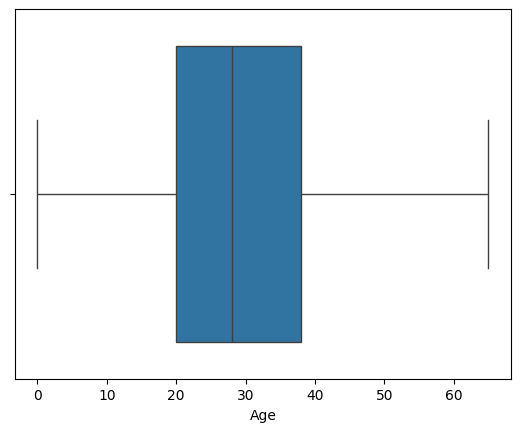

In [346]:
sns.boxplot(x = datatest_age);

## Eksik Veri Problemi Çözümü:

In [347]:
import missingno as msno
testdata = pd.read_csv('titanictest.csv')
testdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Test veri setimizi güncellenmiş haliyle kullanmaya devam ediyoruz
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [348]:
testdata.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       891
dtype: int64

In [349]:
testdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

##### Veri setinde eksik değerleri saptıyoruz.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [350]:
testdata.isnull().sum().sum()

864

##### Veri setinde toplam kaç tane eksik değer var onu hesaplıyoruz.
---------------------------------------------------------------------------------------------------------------------------------------------------------

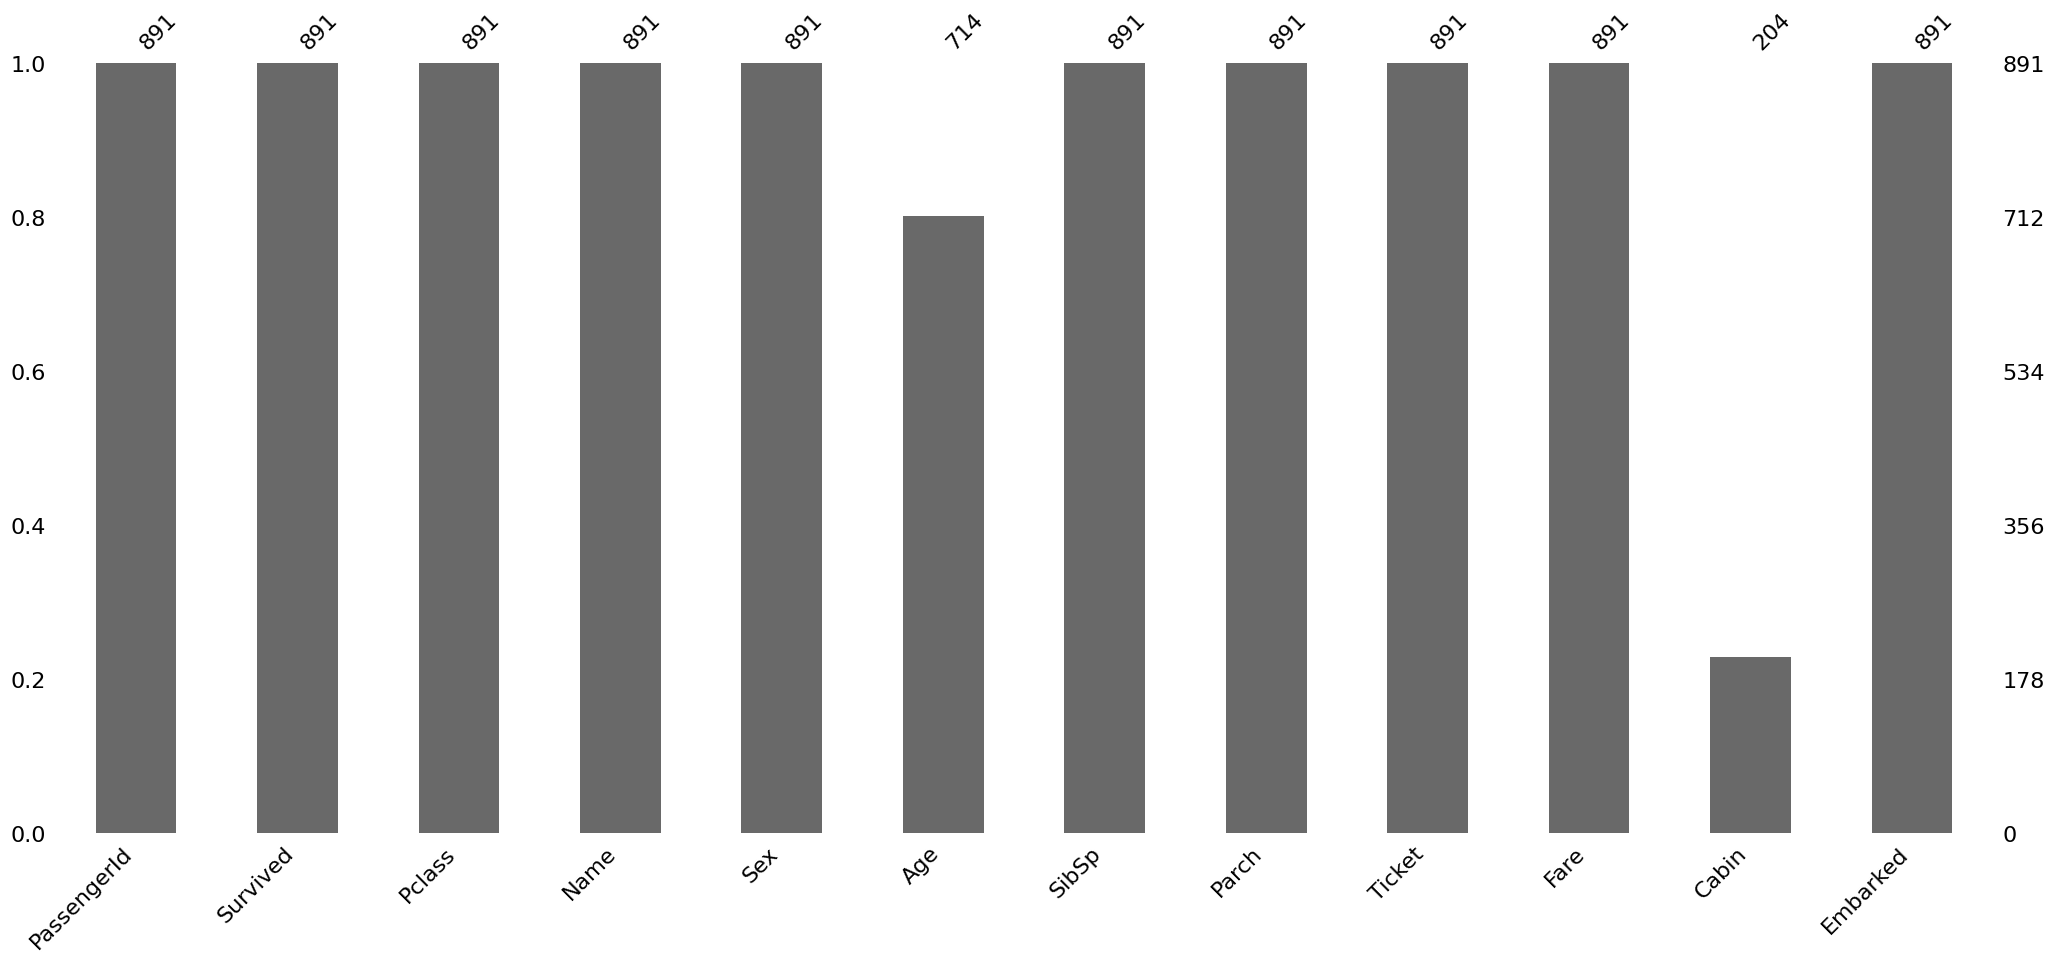

In [351]:
msno.bar(testdata);

##### Veri setinde age ve cabin sütunlarında eksik veri olduğu görülebiliyor.
---------------------------------------------------------------------------------------------------------------------------------------------------------

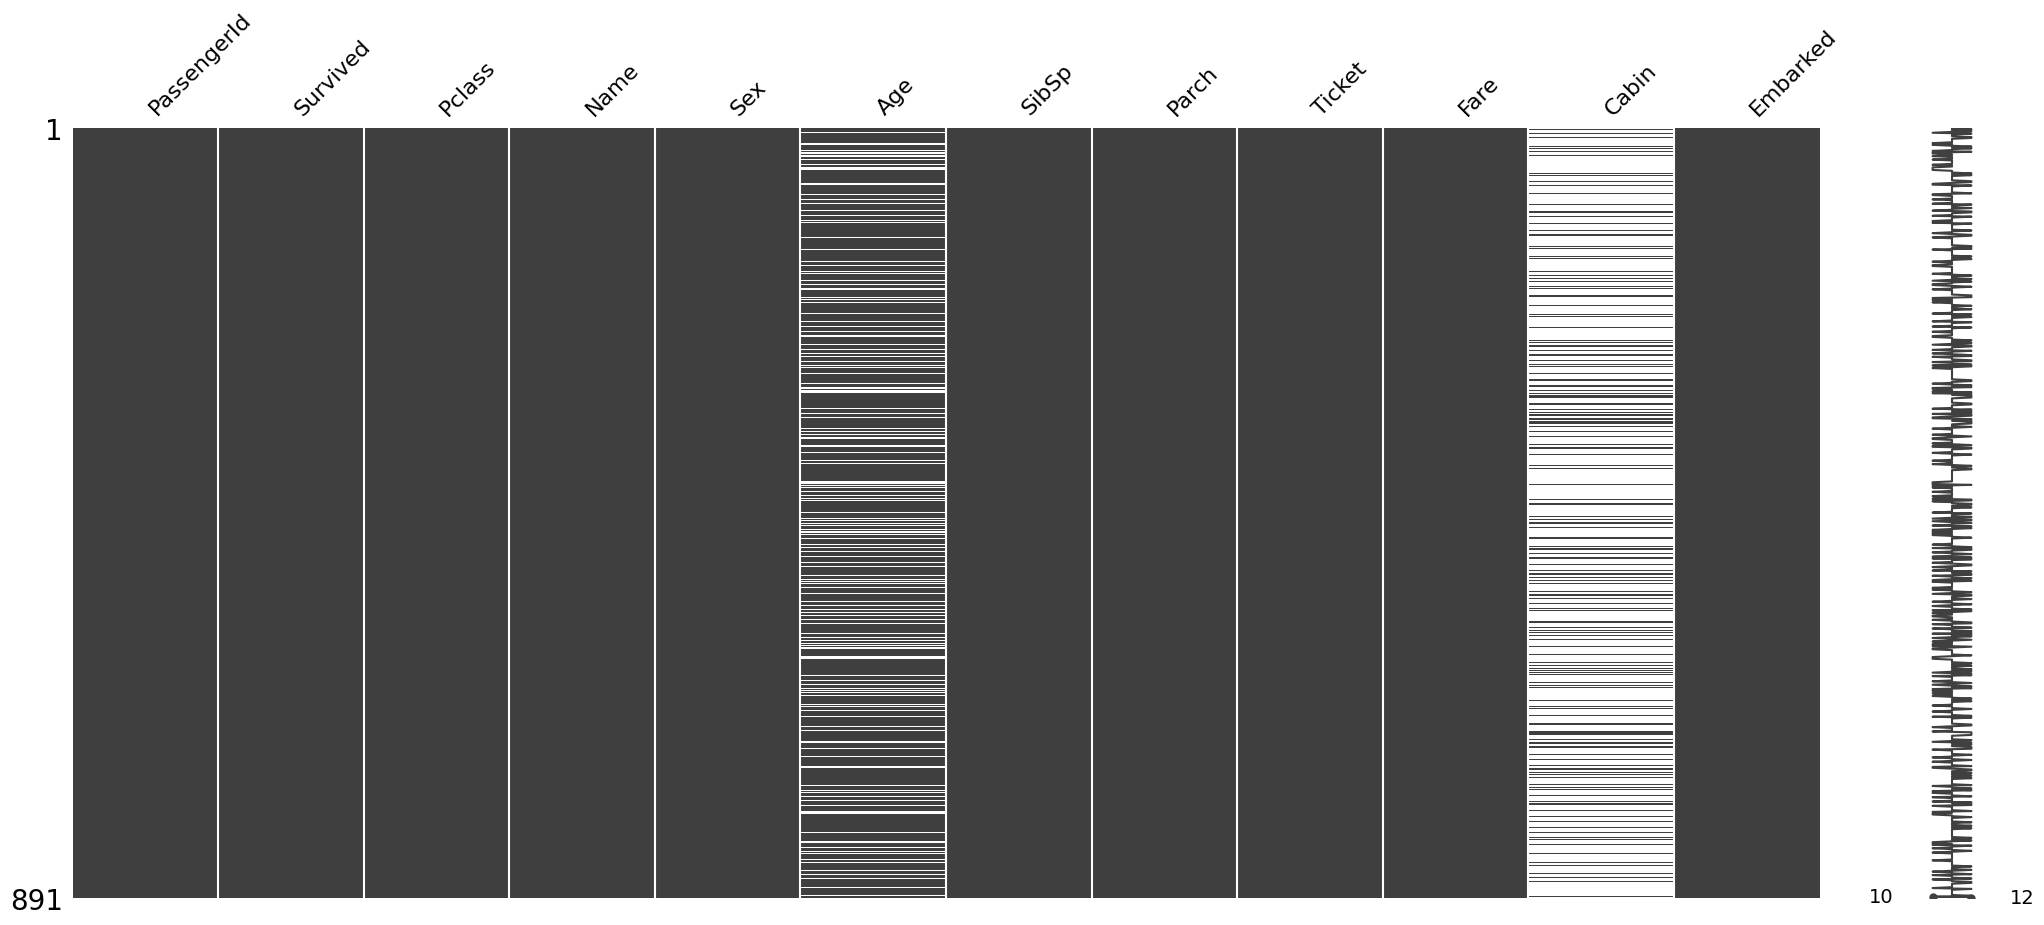

In [352]:
msno.matrix(testdata);

##### Age ve cabin sütunlarında eksik veri daha detaylı gösteriliyor.
---------------------------------------------------------------------------------------------------------------------------------------------------------

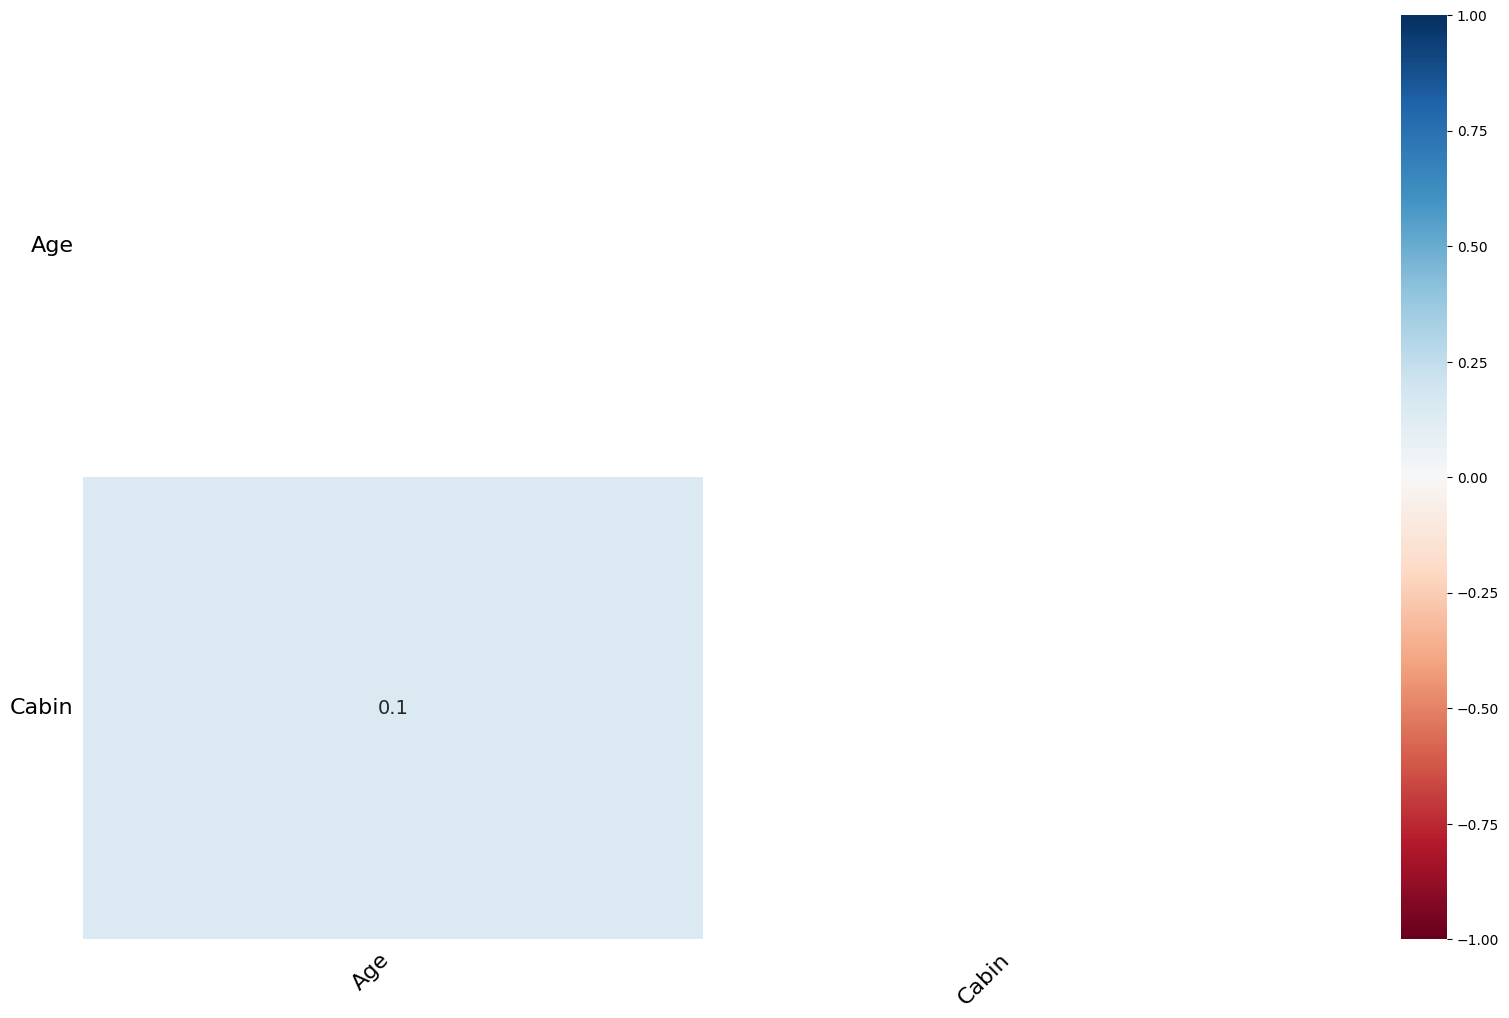

In [353]:
msno.heatmap(testdata);

##### Age ile cabin arasında %10 bir korelasyon var. Buradan söyleyebiliyoruz ki bu veri seti rassal bir eksikliğe sahip değildir. Direk doldurma direk silme gibi işlemleri yapmak beraberinde birtakım problemleri de meydana getirecektir.
---------------------------------------------------------------------------------------------------------------------------------------------------------

## Silme Yöntemi:

In [354]:
#Cabin

In [355]:
import numpy as np
import pandas as pd
deleteData = pd.read_csv('titanictest.csv')
deleteData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [356]:
testdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

##### Cabin sütunu için %50 den fazla bir kayıp veri olduğu için silme işlemi uyguluyoruz.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [357]:
deleteData.drop('Cabin', axis=1, inplace=True)
deleteData.to_csv('titanictest.csv', index=False)

##### Cabin sütunu silindi.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [358]:
deletedData = pd.read_csv('titanictest.csv')
deletedData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


##### Güncellenmiş veri seti.
---------------------------------------------------------------------------------------------------------------------------------------------------------

## Tahmine Dayalı Değer Atama Yöntemi:

In [359]:
from ycimpute.imputer import knnimput
from ycimpute.imputer import EM
import numpy as np
import pandas as pd

testdata = pd.read_csv('titanictest.csv')
testdata = testdata.select_dtypes(include = ['float64', 'int64'])
testdata.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,65.6344
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


##### Veri seti olarak test veri setinden devam ediyoruz.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [360]:
testdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

##### Veri setinde age sütunu için "Tahmine Dayalı Değer Atama" yöntemi kullanıcaz.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [361]:
list(testdata)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

##### Veri setinin int ve float değer içeren sütun isimleri.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [362]:
var_names = list(testdata) 

##### Veri setinin sütun isimlerini ayrı bir listede saklıyoruz.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [363]:
n_testdata = np.array(testdata)

##### Veri setini numpy arraye çeviriyoruz.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [364]:
n_testdata[0:10]

array([[ 1.    ,  0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 2.    ,  1.    ,  1.    , 38.    ,  1.    ,  0.    , 65.6344],
       [ 3.    ,  1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 4.    ,  1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 5.    ,  0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 6.    ,  0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 7.    ,  0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 8.    ,  0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 9.    ,  1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [10.    ,  1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

##### Numpy array içindeki değerler.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [365]:
n_testdata.shape

(891, 7)

##### Numpy array`in özellikleri.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [366]:
n_data = knnimput.KNN(k = 5).complete(n_testdata)

Imputing row 1/891 with 0 missing, elapsed time: 0.115
Imputing row 101/891 with 0 missing, elapsed time: 0.123
Imputing row 201/891 with 0 missing, elapsed time: 0.123
Imputing row 301/891 with 1 missing, elapsed time: 0.123
Imputing row 401/891 with 0 missing, elapsed time: 0.123
Imputing row 501/891 with 0 missing, elapsed time: 0.123
Imputing row 601/891 with 0 missing, elapsed time: 0.123
Imputing row 701/891 with 0 missing, elapsed time: 0.123
Imputing row 801/891 with 0 missing, elapsed time: 0.123


##### n_data nesnesinin eksik olan satırları doldurma işlemi.
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [367]:
type(n_data)

numpy.ndarray

In [368]:
n_data = pd.DataFrame(n_data, columns = var_names)

In [369]:
n_data 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.000000,1.0,0.0,65.6344
2,3.0,1.0,3.0,26.000000,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.000000,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.000000,0.0,0.0,13.0000
887,888.0,1.0,1.0,19.000000,0.0,0.0,30.0000
888,889.0,0.0,3.0,27.516751,1.0,2.0,23.4500
889,890.0,1.0,1.0,26.000000,0.0,0.0,30.0000


In [370]:
n_data.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.000000,1.0,0.0,65.6344
2,3.0,1.0,3.0,26.000000,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.000000,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.000000,0.0,0.0,8.0500
5,6.0,0.0,3.0,33.080293,0.0,0.0,8.4583
6,7.0,0.0,1.0,54.000000,0.0,0.0,51.8625
7,8.0,0.0,3.0,2.000000,3.0,1.0,21.0750
8,9.0,1.0,3.0,27.000000,0.0,2.0,11.1333
9,10.0,1.0,2.0,14.000000,1.0,0.0,30.0708


In [371]:
#EM

In [372]:
dataset = pd.read_csv('titanictest.csv')
dataset = dataset.select_dtypes(include = ['float64', 'int64'])

In [373]:
var_names = list(dataset) #değişken isimlerini saklıyoruz

In [374]:
n_dataset = np.array(dataset)#numpy arraye çeviriyoruz

In [375]:
n_data = EM().complete(n_dataset) #EM algoritması ile dolduruyoruz

In [376]:
n_data = pd.DataFrame(n_data, columns = var_names) #sakladığımız değişken isimleri ile tekrar dataframe'e çeviriyoruz

In [377]:
n_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [378]:
n_data["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    23.264748
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [379]:
datax = pd.read_csv('titanictest.csv')
datax["Age"] = n_data["Age"]
datax['Age'] = datax['Age'].dropna().astype(int)
datax.to_csv('titanictest.csv', index=False)

In [381]:
datax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 73.2+ KB


---------------------------------------------------------------------------------------------------------------------------------------------------------

# Part-3: Sınıflandırma Analizleri:

In [17]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from warnings import filterwarnings
filterwarnings('ignore')

Veri Seti: Titanic

Hedef DeğiŞken --> Survived

Survived:

    1: Hayatta Kalan
    0: Hayatta Kalmayan 

Amaç: Titanic veri seti üzerinde yapılan sınıflandırma analizi ile yolcuların hayatta kalma durumunu tahmin etmek ve bu tahminlerin doğruluğunu değerlendirmektir.

## Lojistik Regresyon

In [18]:
titanic = pd.read_csv("titanictest.csv")
df = titanic.copy()
df = df.dropna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,65.6344,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [20]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

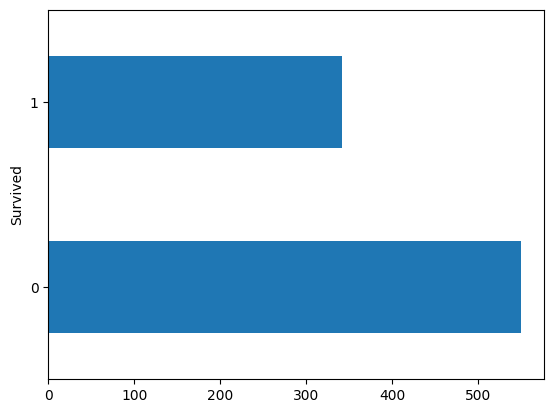

In [21]:
df["Survived"].value_counts().plot.barh();

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Age,891.0,29.169473,13.540676,-5.0,21.0000,29.0000,36.0,65.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,24.046813,20.481625,0.0,7.9104,14.4542,31.0,65.6344


In [23]:
y = df["Survived"]
X = df.drop(["Survived"], axis=1)
#Hedef (bağımlı) değişkeni y 'ye
#Bağımsız değişkenleri X'e atadık

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [27]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

ValueError: could not convert string to float: 'Dodge, Master. Washington'

#                                                                  ~ SON ~
### Beni dinlediğiniz için teşekkürler. Size titanik kazası hakkındaki verilerin işlenmesi ve pek rastlanmayan istatistikleri derledim. Tekrardan teşekkürler.
